In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import networkx as nx

sns.set(font_scale = 1.0, style = 'darkgrid')
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [6]:
csv_file_name = '../data/degrees.csv'
df = pd.read_csv(csv_file_name, header=None, names=['network_type', 'hop', 'node1', 'node2'])
network_type_list = df.network_type.unique()
hop_list = df.hop.unique()
max_hop_list = {'scale_free_4': 6, 'random_4': 9, 'regular_4': 10}

In [7]:
def degree_list(graph: nx.Graph) -> list:
    return list(dict(graph.degree()).values())

def degree_analysis(graph: nx.Graph) -> tuple:
    _degree_list = degree_list(graph)
    return round(np.mean(_degree_list), 3), max(_degree_list), min(_degree_list)

result_df = pd.DataFrame(
    columns = ['network_type', 'hop', 'average_degree', 'max_degree', 'min_degree', 'average_clustering', 'average_distance']
)

In [25]:
# 次数配列をグラフ化
graph_dict = {}
for network_type in network_type_list:
    graph_dict[network_type] = {}
    for hop in hop_list:
        _df = df[(df.network_type == network_type) & (df.hop == hop)][['node1', 'node2']]
        edges = _df.values.tolist()
        
        graph = nx.Graph()
        graph.add_edges_from(edges)
        graph_dict[network_type][hop] = graph

In [9]:
# 特徴量計算
for _network_type in network_type_list:
    _max_hop = max_hop_list[_network_type]

    for _hop in range(1, _max_hop + 1):
        _graph = graph_dict[_network_type][_hop]

        _average_degree, _max_degree, _min_degree = degree_analysis(_graph)
        _average_clustering = nx.average_clustering(_graph)
        _average_distance = nx.average_shortest_path_length(_graph)
        _s = pd.Series([_network_type, _hop, _average_degree, _max_degree, _min_degree, _average_clustering, _average_distance], index=result_df.columns)
        print(_s)
        result_df = result_df.append(_s, ignore_index=True)

network_type          scale_free_4
hop                              1
average_degree               3.994
max_degree                      69
min_degree                       2
average_clustering        0.029158
average_distance          4.098052
dtype: object
network_type          scale_free_4
hop                              2
average_degree              43.026
max_degree                     528
min_degree                       6
average_clustering        0.564458
average_distance          2.278739
dtype: object
network_type          scale_free_4
hop                              3
average_degree             222.738
max_degree                     895
min_degree                      25
average_clustering        0.546415
average_distance          1.777968
dtype: object
network_type          scale_free_4
hop                              4
average_degree             637.332
max_degree                     999
min_degree                     146
average_clustering        0.789649
average_dista

# 図5. スケールフリーネットワークを拡張したネットワークの特徴

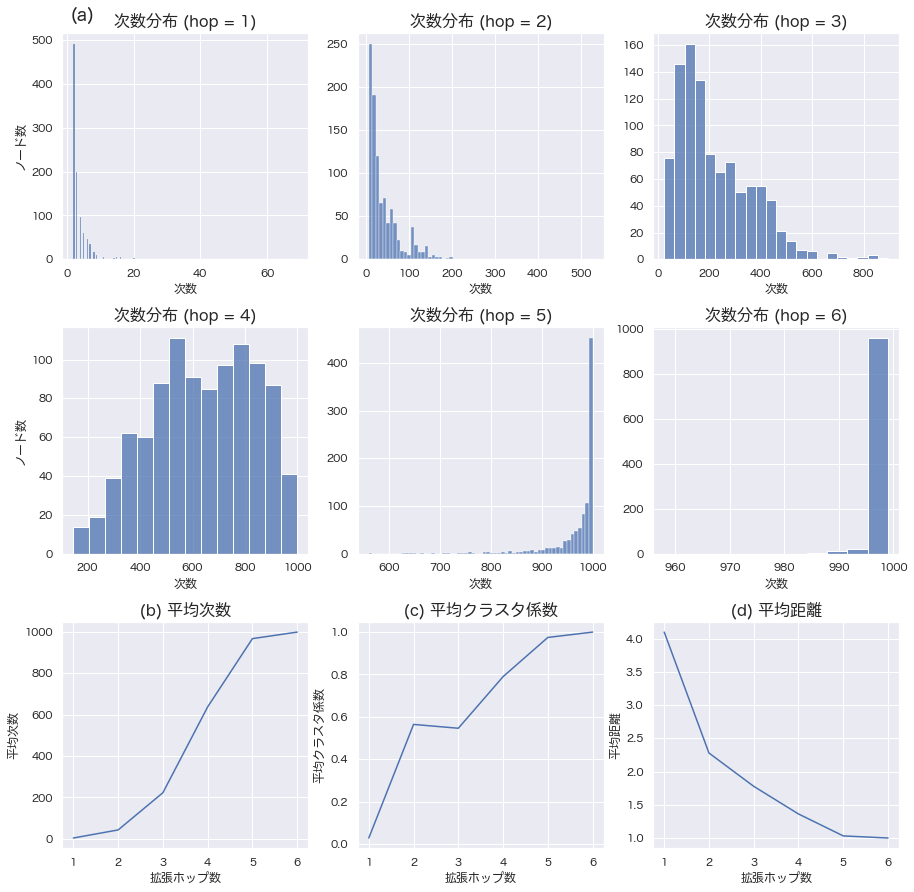

In [10]:
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.text(-12.0, 13.5, '(a)', ha = 'center', va = 'top', fontsize=18)

for _hop in range(1, 7):
    _graph = graph_dict['scale_free_4'][_hop]

    # グラフ描画
    _ax = axes[int((_hop - 1) / 3)][(_hop - 1) % 3]
    sns.histplot(degree_list(_graph), ax = _ax)
    _ax.set_title('次数分布 (hop = {})'.format(_hop), fontsize=16)
    _ax.set_xlabel('次数')

    if _hop % 3 == 1:
        _ax.set_ylabel('ノード数')
    else:
        _ax.set_ylabel('')

_result_df = result_df[result_df.network_type == 'scale_free_4']

p = sns.lineplot(x='hop', y='average_degree', data=_result_df, ax = axes[2][0])
p.set_title('(b) 平均次数', fontsize=16)
p.set_ylabel('平均次数')

p = sns.lineplot(x='hop', y='average_clustering', data=_result_df, ax = axes[2][1])
p.set_title('(c) 平均クラスタ係数', fontsize=16)
p.set_ylabel('平均クラスタ係数')

p = sns.lineplot(x='hop', y='average_distance', data=_result_df, ax = axes[2][2])
p.set_title('(d) 平均距離', fontsize=16)
p.set_ylabel('平均距離')

for _ax in axes[2]:
    _ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    _ax.set_xlabel('拡張ホップ数')

# 図6. ランダムネットワークを拡張したネットワークの特徴

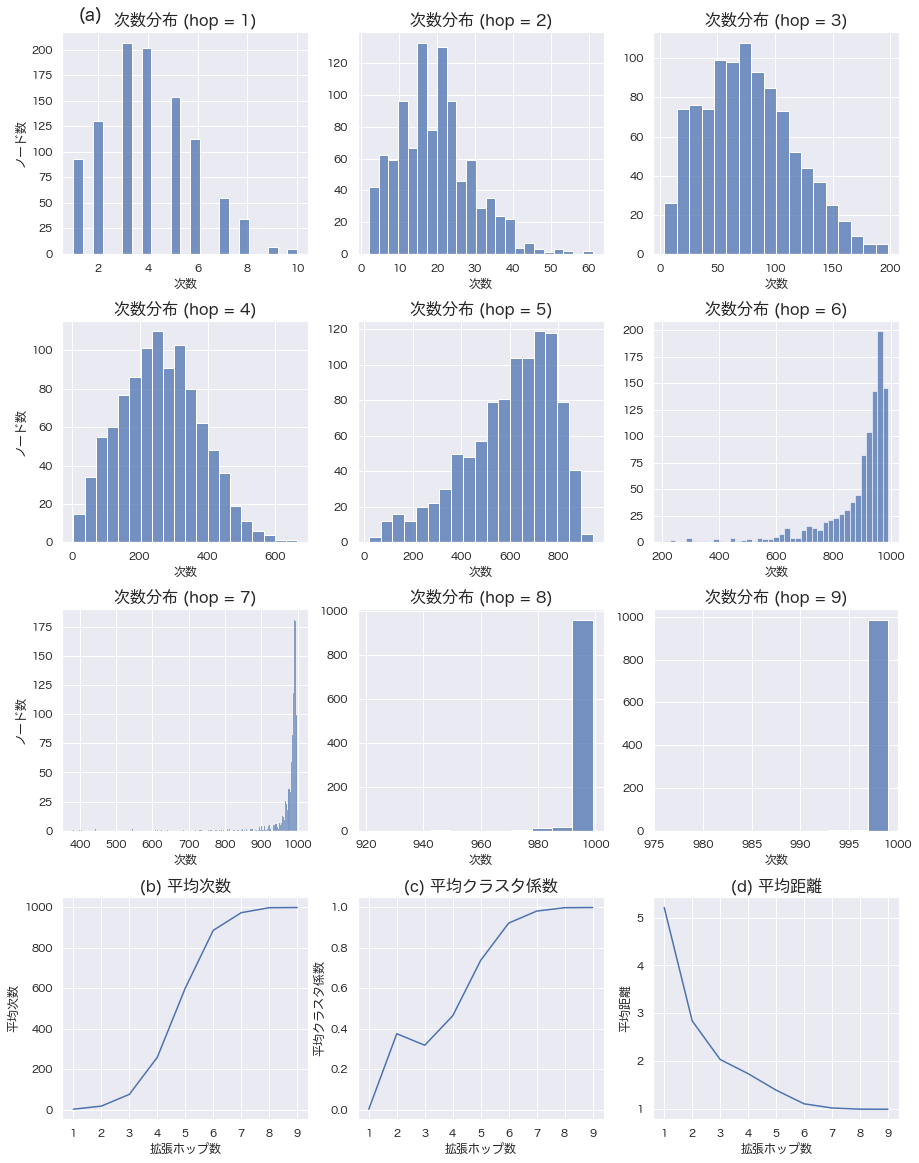

In [24]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.text(-19.5, 24.0, '(a)', ha = 'center', va = 'top', fontsize=18)

for _hop in range(1, 10):
    _graph = graph_dict['random_4'][_hop]

    # グラフ描画
    _ax = axes[int((_hop - 1) / 3)][(_hop - 1) % 3]
    sns.histplot(degree_list(_graph), ax = _ax)
    _ax.set_title('次数分布 (hop = {})'.format(_hop), fontsize=16)
    _ax.set_xlabel('次数')

    if _hop % 3 == 1:
        _ax.set_ylabel('ノード数')
    else:
        _ax.set_ylabel('')


_result_df = result_df[result_df.network_type == 'random_4']

p = sns.lineplot(x='hop', y='average_degree', data=_result_df, ax = axes[3][0])
p.set_title('(b) 平均次数', fontsize=16)
p.set_ylabel('平均次数')

p = sns.lineplot(x='hop', y='average_clustering', data=_result_df, ax = axes[3][1])
p.set_title('(c) 平均クラスタ係数', fontsize=16)
p.set_ylabel('平均クラスタ係数')

p = sns.lineplot(x='hop', y='average_distance', data=_result_df, ax = axes[3][2])
p.set_title('(d) 平均距離', fontsize=16)
p.set_ylabel('平均距離')

for _ax in axes[3]:
    _ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    _ax.set_xlabel('拡張ホップ数')

# 図7. レギュラーネットワークを拡張したネットワークの特徴

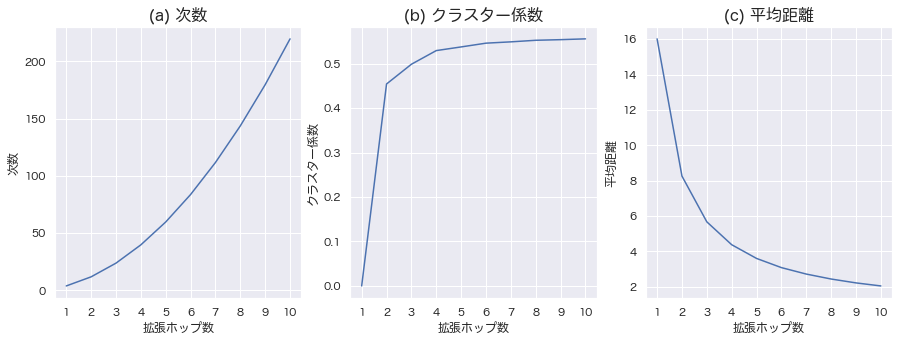

In [12]:
_result_df = result_df[result_df.network_type == 'regular_4']
fig, axes = plt.subplots(ncols = 3, nrows= 1, figsize = (15, 5))

p = sns.lineplot(x='hop', y='average_degree', data=_result_df, ax = axes[0])
p.set_title('(a) 次数', fontsize=16)
p.set_ylabel('次数')

p = sns.lineplot(x='hop', y='average_clustering', data=_result_df, ax = axes[1])
p.set_title('(b) クラスター係数', fontsize=16)
p.set_ylabel('クラスター係数')

p = sns.lineplot(x='hop', y='average_distance', data=_result_df, ax = axes[2])
p.set_title('(c) 平均距離', fontsize=16)
p.set_ylabel('平均距離')

for _ax in axes:
    _ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    _ax.set_xlabel('拡張ホップ数')